# YAIA Summarizer
### (_Yet Another Intelligent Assistant_) 

In [1]:
import numpy as np
import pandas as pd

#### Installing xmltodict library to parse xml data

In [3]:
#!pip install xmltodict

In [2]:
import xmltodict

#### Importing the BC3 corpus

In [3]:
# raw corpus
with open('Resources/bc3/corpus.xml') as fd:
    corpus = xmltodict.parse(fd.read())
    
# annotated corpus
with open("Resources/bc3/annotation.xml") as fd:
    annotatedCorpus = xmltodict.parse(fd.read())

## The BC3 Corpus
### _The raw corpus_

#### Exploring tasks and data processing

In [4]:
len(corpus["root"]["thread"])

40

** Tasks **
   - defining the base dataframe
        - columns names: thread_num, id, threadName, received, from, to, subject, sentence_id, sentence_content

In [5]:
corpusDF = pd.DataFrame(columns=["thread_num", "id", "name", "received", "from", "to", "subject", "sentence_id", "sentence_content"])

In [6]:
for idx, val in enumerate(corpus["root"]["thread"]):
#     print(idx) # number of thread
#     print(val["listno"]) # ide number
#     print(val["name"]) # name of the thread
    for doc in val["DOC"]:
#         print(doc["Received"]) # date of mail
#         print(doc["From"]) # who sends the email
#         print(doc["To"]) # to whom the mail is
#         print(doc["Subject"]) # the subject of the mail
        if isinstance(doc["Text"]["Sent"], list) == False:
#             print(doc["Text"]["Sent"]["@id"])
#             print(doc["Text"]["Sent"]["#text"])
            corpusDF = corpusDF.append({
                "thread_num": idx, 
                "id": val["listno"], 
                "name":val["name"],
                "received": doc["Received"], 
                "from": doc["From"], 
                "to": doc["To"], 
                "subject": doc["Subject"], 
                "sentence_id": doc["Text"]["Sent"]["@id"], 
                "sentence_content": doc["Text"]["Sent"]["#text"]
            }, ignore_index=True)
        else:
            for text in doc["Text"]["Sent"]:
#                 print(text["@id"]) # the sentence_id
#                 print(text["#text"]) # the sentence_content
                corpusDF = corpusDF.append({
                    "thread_num": idx, 
                    "id": val["listno"], 
                    "name":val["name"],
                    "received": doc["Received"], 
                    "from": doc["From"], 
                    "to": doc["To"], 
                    "subject": doc["Subject"], 
                    "sentence_id": text["@id"], 
                    "sentence_content": text["#text"]
                }, ignore_index=True)


In [7]:
corpusDF["id"].unique()

array(['007-7484738', '015-2625401', '023-2964247', '026-4380722',
       '043-10248963', '053-15491914', '053-15927827', '058-13714734',
       '059-11070771', '059-15393869', '059-7186494', '059-9045120',
       '060-0021651', '060-4302525', '061-10140940', '063-1009111',
       '066-15270802', '067-1027069', '067-11978590', '068-16207900',
       '070-4154814', '071-10334272', '074-0998972', '074-14150913',
       '074-2313297', '074-6324762', '075-15948761', '075-16233750',
       '076-4622322', '077-4500595', '078-1321398', '078-15693133',
       '078-3797219', '078-6832141', '078-8112187', '079-14194071',
       '079-4736087', '080-5970135', '094-2808305', '107-16164699'],
      dtype=object)

In [8]:
corpusDF.shape

(3222, 9)

In [9]:
corpusDF.loc[corpusDF["thread_num"]==0,:].head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr..."
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and..."
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...


### _The annotated corpus_

** Tasks **
   - defining the base dataframe
        - columns names: thread_num, id, threadName, annotator_id, annotation_date, important_sentence_id

In [10]:
annotatedDF = pd.DataFrame(columns=["thread_num", "id", "thread_name", "annotator_id", "annotation_date", "important_sentence_id"])

In [11]:
for idx, val in enumerate(annotatedCorpus["root"]["thread"]):
#     print(idx) # number of thread
#     print(val["listno"]) # ide number
#     print(val["name"]) # name of the thread
    for annotation in val["annotation"]:
#         print(annotation["desc"]) # annotator id
#         print(annotation["date"]) # date of annotation
        for sent in annotation["sentences"]["sent"]:
#             print(sent["@id"]) # the important_sentence_id
            annotatedDF = annotatedDF.append({
                "thread_num": idx, 
                "id": val["listno"], 
                "thread_name":val["name"],
                "annotator_id": annotation["desc"], 
                "annotation_date": annotation["date"], 
                "important_sentence_id": sent["@id"]
            }, ignore_index=True)

In [12]:
annotatedDF.head()

,thread_num,id,thread_name,annotator_id,annotation_date,important_sentence_id
0,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.1
1,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.2
2,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.3
3,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,1.4
4,0,067-11978590,AU WG joining us for an afternoon at F2F in Br...,Annotator7-Part2,Fri May 23 14:01:53 -0700 2008,2.4


In [13]:
annotatedDF.shape

(1689, 6)

In [14]:
annotatedDF.loc[annotatedDF["thread_num"]==2,:].head()

,thread_num,id,thread_name,annotator_id,annotation_date,important_sentence_id
97,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,1.1
98,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,2.5
99,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,3.2
100,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,5.1
101,2,080-5970135,legal case Ryan air,Annotator10-Part2,Wed Jun 04 13:47:44 -0700 2008,8.2


#### Getting the sentence score according annotators

   - There are 3 annotators per mail
   - Threshold = 2 (if 2 or more than 2 annotators scored a sentence as important)

In [15]:
annotatedScores = annotatedDF.groupby(['id', 'important_sentence_id']).size().reset_index(name="score").iloc[:,[0,1,2]].query("score >= 2")

In [16]:
annotatedScores.head()

,id,important_sentence_id,score
0,007-7484738,1.1,2
1,007-7484738,1.2,3
2,007-7484738,1.3,2
3,007-7484738,1.4,2
4,007-7484738,1.5,2


In [17]:
annotatedScores.shape

(555, 3)

In [18]:
annotatedScores.rename(columns={"important_sentence_id": "sentence_id"}, inplace=True)

In [19]:
annotatedScores.head()

,id,sentence_id,score
0,007-7484738,1.1,2
1,007-7484738,1.2,3
2,007-7484738,1.3,2
3,007-7484738,1.4,2
4,007-7484738,1.5,2


In [20]:
corpusDF.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr..."
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and..."
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...


In [21]:
scoredCorpus = pd.merge(corpusDF, annotatedScores, how="left", on=['id', 'sentence_id'])

In [22]:
scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",2.0
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,3.0
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",2.0
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,2.0
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,2.0


In [23]:
scoredCorpus.shape

(3222, 10)

In [24]:
scoredCorpus.loc[scoredCorpus["thread_num"]==0,:].head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score
0,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",2.0
1,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,3.0
2,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",2.0
3,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,2.0
4,0,007-7484738,Extending IETF meetings to two weeks?,Tue Dec 08 07:30:52 -0800 1998,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,2.0


In [25]:
# scoredCorpus["score"].fillna(0, inplace=True)
# scoredCorpus.loc[scoredCorpus["score"]>0, "score"] = 1
scoredCorpus.loc[scoredCorpus["score"]>0, "score"] = "Important"
scoredCorpus["score"].fillna("No important", inplace=True)


In [26]:
scoredCorpus.shape

(3222, 10)

** Adding the text sentence / email features **
   - sentence_position. _The position of the sentence in the thread_
   - words_in_sentence. _The number of words in the sentence_
   - is_question. _Does the sentence has a question mark?_
   - position_mail. _The position of the mail in the thread_
   - is_money. _Does the sentence has numbers?_
   - is_date. _Does the sentence has a date?_
   - is_in_title. _Does a word sentence appears in the thread title?
   - tf_idf_score. _The sentence score in the mail_
   - tf_idf_total_score. _The sentence score in the thread_

In [27]:
# ******* sentence_position ********

# converting received date to datetime
scoredCorpus["received"] =  pd.to_datetime(scoredCorpus["received"])

In [28]:
# ordering the dataframe by thread and date 
scoredCorpus.sort_values(by=['thread_num', 'received'], ascending=[True, True], inplace=True)

In [29]:
sentencePosition = []
threads = scoredCorpus.loc[:,["thread_num"]].drop_duplicates().reset_index(drop=True)

# getting sentence position
for thread in threads["thread_num"]:
    sentenceNumber = len(scoredCorpus.loc[scoredCorpus["thread_num"]==thread]) +1
    positions = np.arange(1,sentenceNumber, 1).tolist()
    sentencePosition.extend(positions)

In [30]:
sp = pd.DataFrame(sentencePosition)

In [31]:
sp.rename(columns={0:"sentence_position"}, inplace=True)
scoredCorpus = pd.concat([scoredCorpus, sp], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5


In [32]:
# ******* words_in_sentence ********

#  ------ ToDo remove stop words to reduce noise, also remove weird symbols ----------
from nltk.tokenize import word_tokenize

# tokenizing and counting words per sentence
words_in_sentence = []
for sentence in scoredCorpus["sentence_content"]:
    tokens = len(word_tokenize(sentence))
    words_in_sentence.append(tokens)

In [33]:
wis = pd.DataFrame(words_in_sentence)

In [34]:
wis.rename(columns={0:"words_in_sentence"}, inplace=True)
scoredCorpus = pd.concat([scoredCorpus, wis], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51


In [35]:
# ******* is_question ********

# ToDo: Change this pleaseee
# not fancy but works
is_question = []
for sentence in scoredCorpus["sentence_content"]:
    if sentence.find("?") != -1:
        is_question.append(1)
    else:
        is_question.append(0)

In [36]:
iq = pd.DataFrame(is_question)

In [37]:
iq.rename(columns={0:"is_question"}, inplace=True)
scoredCorpus = pd.concat([scoredCorpus, iq], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0


In [38]:
# ******* position_mail ********

threadMails = scoredCorpus.loc[:,["thread_num", "id", "received"]].drop_duplicates().reset_index(drop=True)
threadMails.head(10)

,thread_num,id,received
0,0,007-7484738,1998-12-08 15:30:52
1,0,007-7484738,1998-12-10 04:21:11
2,0,007-7484738,1998-12-10 15:09:32
3,0,007-7484738,1998-12-10 19:55:56
4,0,007-7484738,1998-12-12 00:02:06
5,1,015-2625401,2003-04-25 13:39:28
6,1,015-2625401,2003-04-25 14:12:54
7,1,015-2625401,2003-04-25 14:22:24
8,1,015-2625401,2003-04-25 14:36:41
9,1,015-2625401,2003-04-25 17:32:27


In [39]:
threadMails["position_mail"] = threadMails.groupby(["thread_num", "id"]).cumcount()+1

In [40]:
threadMails.head(10)

,thread_num,id,received,position_mail
0,0,007-7484738,1998-12-08 15:30:52,1
1,0,007-7484738,1998-12-10 04:21:11,2
2,0,007-7484738,1998-12-10 15:09:32,3
3,0,007-7484738,1998-12-10 19:55:56,4
4,0,007-7484738,1998-12-12 00:02:06,5
5,1,015-2625401,2003-04-25 13:39:28,1
6,1,015-2625401,2003-04-25 14:12:54,2
7,1,015-2625401,2003-04-25 14:22:24,3
8,1,015-2625401,2003-04-25 14:36:41,4
9,1,015-2625401,2003-04-25 17:32:27,5


In [41]:
scoredCorpus["position_mail"] = 0

In [42]:
# ToDo: Simplify this assignment, include the received date as condition in the query

for mailDate in threadMails["received"]:
    position = threadMails.loc[threadMails["received"] == mailDate, "position_mail"].values[0]
    scoredCorpus.loc[scoredCorpus['received'] == mailDate, "position_mail"] = position
    

In [43]:
scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1


In [44]:
# ******* is_money ********

import re

# regex to evaluate if the word is a number or an amount
pattern = "^\$?(?=\(.*\)|[^()]*$)\(?\d{1,3}(,?\d{3})?(\.\d\d?)?\)?$"

is_money = []
for sentence in scoredCorpus["sentence_content"]:
    words = sentence.split(" ")
    for w in words:
        result = re.match(pattern, w)
        if result:
            is_money.append(1)
            break
    else:
        is_money.append(0)


In [45]:
im = pd.DataFrame(is_money, columns=["is_money"])
scoredCorpus = pd.concat([scoredCorpus, im], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0


In [46]:
# ******* is_date ********

# regex to evaluate if the word is a date: mm/dd/yy, mm/dd/yyyy, dd/mm/yy, and dd/mm/yyyy
pattern = "^(?:(1[0-2]|0?[1-9])/(3[01]|[12][0-9]|0?[1-9])|(3[01]|[12][0-9]|0?[1-9])/(1[0-2]|0?[1-9]))/(?:[0-9]{2})?[0-9]{2}$"
# months of the year
months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"\
         "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
# weekdays
days = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "mon", "tue", "wed", "thu", "fri", "sat", "sun"]

is_date = []
for sentence in scoredCorpus["sentence_content"]:
    words = sentence.split(" ")
    for w in words:
        resPattern = re.match(pattern, w)
        resMonth   = np.isin(w.lower(), months)
        resWeekday = np.isin(w.lower(), days)
        
        if resPattern or resMonth or resWeekday:
            is_date.append(1)
            break         
    else:
        is_date.append(0)
        

In [47]:
len(is_date)

3222

In [48]:
idate = pd.DataFrame(is_date, columns=['is_date'])
scoredCorpus = pd.concat([scoredCorpus, idate], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1


In [49]:
# ******* is_in_title ********

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))

is_in_title = []
for index, row in scoredCorpus.iterrows():
    subjectTokens = word_tokenize(row["subject"].lower())
    filteredSubject = [w for w in subjectTokens if not w in stop_words]
    sentenceTokens = word_tokenize(row["sentence_content"].lower())
    filteredSentence = [w for w in sentenceTokens if not w in stop_words]
    
    result = np.isin(filteredSentence, filteredSubject)
    fResult = np.isin(True, result)
    
    if fResult:
        is_in_title.append(1)
    else:
        is_in_title.append(0)

In [50]:
len(is_in_title)

3222

In [51]:
it = pd.DataFrame(is_in_title, columns=['is_in_title'])
scoredCorpus = pd.concat([scoredCorpus, it], axis=1)

scoredCorpus.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0,1
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0,1
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0,1
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0,1
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1,0


### Splitting data to calculate the TFIDF scores

In [145]:
# 80% of the scored corpus for train (32 from 40 emails)
train = scoredCorpus.query("thread_num <= 27") #31
print(train.shape)

# 20% of the scored corpus for test (8 from 40 emails)

test = scoredCorpus.query("thread_num > 27")
print(test.shape)

(2318, 17)
(904, 17)


In [146]:
import sklearn

# Function to calculate the TF-IDF

def scoreSentences(sentences):
    scores = []

    # define the vectorizer function
    vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
        max_features=1024, stop_words='english')
    # encode sentences
    # output (sentence number, word index in vocabulary)
    # and word score in the whole vocabulary
    X = vectorizer.fit_transform(sentences)

    # NEXT --- scoring the sentence: 
    # according the score, decide whether include it in the
    # final summary or not

    # ----------- Approaches ------------ #
    # formula 1: 
    # sentence score = total terms values in the sentence
    # / total of terms in the sentence

    # formula 2: 
    # sentence score = total terms values in the sentence
    # / total of words in the sentence
    
    # formula 3: 
    # sentence score = total terms values in the sentence
    
    # formula 4: 
    # sentence score = total terms values in the sentence
    # / total of terms in the text


    for idx, v in enumerate(X):
        # print("Sentence number: ", idx)
        # print(v)

        totalTermSentenceValue = v.sum(axis=None)
        # print("Total sentence term value: ", totalTermSentenceValue)
        termSentenceLength = v.getnnz()
        # print("Number terms in the sentence: ", termSentenceLength)

        # formula 1:
        # sentenceScore = totalTermSentenceValue / termSentenceLength

        #formula 2:
        # numWordsPerSentence = len(sentences[idx])
        # sentenceScore = totalTermSentenceValue / numWordsPerSentence

        # formula 3:
        # sentenceScore = totalTermSentenceValue

        # formula 4:
        sentenceScore = totalTermSentenceValue / X.sum(axis=None)

        # print("Sentence score: ", sentenceScore)
        # print("\n")

        scores.append((idx, round(sentenceScore,2)))

    return scores


In [147]:
# calculates the tf-idf sentence score
def tfidf(data, typeScore):
    
    if typeScore == "mailScore":
        threadMails = data.loc[:,["thread_num", "id", "received"]].drop_duplicates().reset_index(drop=True)
    elif typeScore == "threadScore":
        threadMails = data.loc[:,["thread_num"]].drop_duplicates().reset_index(drop=True)

    tf_idf_score = []
    for index, row in threadMails.iterrows():
        
        if typeScore == "mailScore":
            s = data.loc[(data["received"]==row["received"]) & (data["thread_num"]==row["thread_num"])].iloc[:,[8]]
        elif typeScore == "threadScore":
            s = data.loc[(data["thread_num"]==row["thread_num"])].iloc[:,[8]]

        sentences = s["sentence_content"].tolist()
        normalizedSentences = [s.lower() for s in sentences]
        scoredSentences = scoreSentences(normalizedSentences)
        _,score = zip(*scoredSentences)
        tf_idf_score.extend(score)
    
    return tf_idf_score
    

#### TF-IDF in training data

In [148]:
# ******* tf_idf_total_score ********

tf_idf_score = tfidf(train, "mailScore")
len(tf_idf_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


2318

In [149]:
tfScore = pd.DataFrame(tf_idf_score, columns=['tf_idf_score'])
train = pd.concat([train, tfScore], axis=1)
train.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0,1,0.14
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0,1,0.16
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0,1,0.10
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0,1,0.15
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1,0,0.15


In [150]:
# ******* tf_idf_total_score ********

tf_idf_total_score = tfidf(train, "threadScore")
len(tf_idf_total_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


2318

In [151]:
tfTotalScore = pd.DataFrame(tf_idf_total_score, columns=['tf_idf_total_score'])
train = pd.concat([train, tfTotalScore], axis=1)
train.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.1,"The IETF meetings tend to become too large, cr...",Important,1,15,0,1,0,0,1,0.14,0.03
1,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.2,I suggest that future meetings are held for tw...,Important,2,29,0,1,0,0,1,0.16,0.03
2,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.3,"Those who so wish could attend both weeks, and...",Important,3,18,0,1,0,0,1,0.10,0.02
3,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.4,Those who choose to attend both weeks would be...,Important,4,23,0,1,0,0,1,0.15,0.03
4,0,007-7484738,Extending IETF meetings to two weeks?,1998-12-08 15:30:52,Jacob Palme <jpalme@dsv.su.se>,discuss@apps.ietf.org,Extending IETF meetings to two weeks?,1.5,The Friday of the first week could discuss app...,Important,5,51,0,1,0,1,0,0.15,0.03


#### TF-IDF in testing data

In [152]:
test.reset_index(drop=True, inplace=True)
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title
0,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.1,"please excuse cross-posting, I have copied thi...",Important,1,31,0,1,1,0,0
1,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.2,jonathan chetwynd,No important,2,2,0,1,0,0,0
2,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.3,jc@signbrowser.org.uk,No important,3,3,0,1,0,0,0
3,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.4,special needs teacher,No important,4,3,0,1,0,0,0
4,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.5,web accessibility consultant,No important,5,3,0,1,0,0,0


In [153]:
# ******* tf_idf_score ********

tf_idf_score = tfidf(test, "mailScore")
len(tf_idf_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


904

In [154]:
tfScore = pd.DataFrame(tf_idf_score, columns=['tf_idf_score'])
test = pd.concat([test, tfScore], axis=1)
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score
0,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.1,"please excuse cross-posting, I have copied thi...",Important,1,31,0,1,1,0,0,0.07
1,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.2,jonathan chetwynd,No important,2,2,0,1,0,0,0,0.03
2,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.3,jc@signbrowser.org.uk,No important,3,3,0,1,0,0,0,0.04
3,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.4,special needs teacher,No important,4,3,0,1,0,0,0,0.03
4,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.5,web accessibility consultant,No important,5,3,0,1,0,0,0,0.03


In [155]:
# ******* tf_idf_total_score ********

tf_idf_total_score = tfidf(test, "threadScore")
len(tf_idf_total_score)

/home/twarrior/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


904

In [156]:
tfTotalScore = pd.DataFrame(tf_idf_total_score, columns=['tf_idf_total_score'])
test = pd.concat([test, tfTotalScore], axis=1)
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.1,"please excuse cross-posting, I have copied thi...",Important,1,31,0,1,1,0,0,0.07,0.03
1,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.2,jonathan chetwynd,No important,2,2,0,1,0,0,0,0.03,0.01
2,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.3,jc@signbrowser.org.uk,No important,3,3,0,1,0,0,0,0.04,0.01
3,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.4,special needs teacher,No important,4,3,0,1,0,0,0,0.03,0.01
4,28,076-4622322,Fw: Thank you!,2000-09-01 22:02:12,jonathan chetwynd <jc@signbrowser.org.uk>,"""eowg"" <w3c-wai-eo@w3.org> , <w3c-wai-ig@w3.org>",Fw: Thank you!,1.5,web accessibility consultant,No important,5,3,0,1,0,0,0,0.03,0.01


##### Selecting columns and encoding categorical values

In [281]:
# Base columns: thread_num, sentence_id, score, sentence_position, words_in_sentence, is_question, position_mail, is_money, is_date,
#               is_in_title, tf_idf_score, tf_idf_total_score

# trying different features
dfTrain = train.drop(["id","name","received","from","to","subject", "sentence_content"], axis=1)
dfTest = test.drop(["id","name","received","from","to","subject", "sentence_content"], axis=1)

# dfTrain = train.drop(["id","name","received","from","to","subject", "sentence_content", 
#                       "sentence_position", "position_mail", "thread_num", "sentence_id"], axis=1)
# dfTest = test.drop(["id","name","received","from","to","subject", "sentence_content", 
#                     "sentence_position", "position_mail", "thread_num", "sentence_id"], axis=1)


In [282]:
dfTrain.head()

,score,words_in_sentence,is_question,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,Important,15,0,0,0,1,0.14,0.03
1,Important,29,0,0,0,1,0.16,0.03
2,Important,18,0,0,0,1,0.10,0.02
3,Important,23,0,0,0,1,0.15,0.03
4,Important,51,0,0,1,0,0.15,0.03


In [283]:
dfTest.head()

,score,words_in_sentence,is_question,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,Important,31,0,1,0,0,0.07,0.03
1,No important,2,0,0,0,0,0.03,0.01
2,No important,3,0,0,0,0,0.04,0.01
3,No important,3,0,0,0,0,0.03,0.01
4,No important,3,0,0,0,0,0.03,0.01


#### Oversampling the training data

   - As the dataset is unbalanced, let's implement SMOTE oversampling to the minority class in the training data *ONLY*

In [284]:
# ****** Checking the unbalanced of the data ******

# total sentences in the train dataset
print(train.shape[0])
# important sentences in the train dataset
print(train.query("score=='Important'").shape[0])
# not important sentences in the train dataset
print(train.query("score=='No important'").shape[0])

2318
379
1939


In [285]:
# Defining the X_train, y_train, X_test and y_test data

X_train = dfTrain.drop("score", axis=1)
y_train = dfTrain["score"][:]
y_train.loc[y_train.values == "Important"] = 1
y_train.loc[y_train.values == "No important"] = 0
print(dfTrain.shape)
print(X_train.shape)
print(y_train.shape)


X_test = dfTest.drop("score", axis=1)
y_test = dfTest["score"][:]
y_test.loc[y_test.values == "Important"] = 1
y_test.loc[y_test.values == "No important"] = 0
print(dfTest.shape)
print(X_test.shape)
print(y_test.shape)

(2318, 8)
(2318, 7)
(2318,)
(904, 8)
(904, 7)
(904,)


#### Implementing the SMOTE oversampling 

In [286]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0 No important", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1 Important", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

Automatically created module for IPython interactive environment


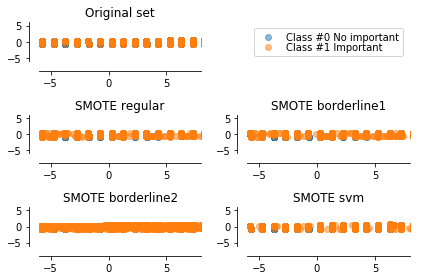

In [287]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train)


# Applying SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X_train, y_train)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y_train, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0 No important', 'Class #1 Important'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

In [288]:
# ****** Checking the new resampled data ******

import collections

# total sentences in the train dataset
print(train.shape[0])
# total sentences in the reesampled dataset [3] corresponds to SMOTE of kind SVM
print(sorted(collections.Counter(y_resampled[3]).items()))


2318
[(0, 1939), (1, 1938)]


In [289]:
X_resampled[3]

array([[1.50000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.40000000e-01, 3.00000000e-02],
       [2.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.60000000e-01, 3.00000000e-02],
       [1.80000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e-01, 2.00000000e-02],
       ...,
       [1.40000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92941622e-02, 1.00000000e-02],
       [1.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.10000000e-01, 9.22716351e-03],
       [1.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.08471766e-01, 2.15282344e-02]])

## The machine learning process

In [290]:
import nltk
import sklearn
import sklearn.multiclass
from sklearn.externals import joblib

path = '../app/ml_models/'

_Checking the testing data_

In [291]:
# important sentences in the test data
print(len(y_test.loc[y_test.values == 1]))
# no important sentences in the test data
print(len(y_test.loc[y_test.values == 0]))

176
728


In [292]:
# fit the model with each kind of oversampled data

def fitModel(X_res, y_res, classifierName, clf):
    for i in range(len(X_res)):
        clf.fit(X_res[i], y_res[i])
        classif_report = sklearn.metrics.classification_report(
            y_test,
            clf.predict(X_test)
        )
        print("Email classification report from ",classifierName,", SMOTE = ",kind[i])
        print(classif_report)

        test_acc = sklearn.metrics.accuracy_score(
            y_test,
            clf.predict(X_test)
        )

        print("Test-data overall accuracy", test_acc)
        print("------------------------------------\n")

#### Support Vector Machines

In [293]:
clf = sklearn.multiclass.OneVsRestClassifier(sklearn.svm.LinearSVC())

In [173]:
clf.fit(X_resampled[3], y_resampled[3])

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [174]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf.predict(X_test)
)

In [175]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.85      0.88      0.87       728
          1       0.42      0.36      0.39       176

avg / total       0.77      0.78      0.77       904

Test-data overall accuracy 0.7787610619469026


In [294]:
# fitting all data in the same model to compare accuracy

fitModel(X_resampled, y_resampled, "SVM", clf)

Email classification report from  SVM , SMOTE =  regular
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       728
          1       0.40      0.12      0.19       176

avg / total       0.74      0.79      0.75       904

Test-data overall accuracy 0.793141592920354
------------------------------------

Email classification report from  SVM , SMOTE =  borderline1
             precision    recall  f1-score   support

          0       0.87      0.73      0.80       728
          1       0.34      0.56      0.42       176

avg / total       0.77      0.70      0.72       904

Test-data overall accuracy 0.6991150442477876
------------------------------------

Email classification report from  SVM , SMOTE =  borderline2
             precision    recall  f1-score   support

          0       0.88      0.71      0.79       728
          1       0.33      0.59      0.43       176

avg / total       0.77      0.69      0.72       904

Test-data

In [176]:
predClass = clf.predict(X_test)

In [177]:
predClass

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
test.head()

,thread_num,id,name,received,from,to,subject,sentence_id,sentence_content,score,sentence_position,words_in_sentence,is_question,position_mail,is_money,is_date,is_in_title,tf_idf_score,tf_idf_total_score
0,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.1,"Dear All,",No important,1,3,0,1,0,0,0,0.03,0.01
1,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.2,I found this interesting Website accessibility...,Important,2,12,0,1,0,0,1,0.08,0.02
2,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.3,Apologies now in case this page is not accessible,No important,3,9,0,1,0,0,0,0.05,0.01
3,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.4,- it's just that the results are very interest...,Important,4,36,0,1,0,0,1,0.08,0.02
4,32,078-3797219,Interesting Poll on Accessibility,2002-06-19 16:03:36,Simon White <simon.white@jkd.co.uk>,"""WAI List (E-mail)"" <w3c-wai-ig@w3.org>",Interesting Poll on Accessibility,1.5,Kind regards,No important,5,2,0,1,0,0,0,0.04,0.01


In [178]:
# Getting the predicted data

def getPredictedSentences(predClass, thread):
    tData = test.copy()
    pred = pd.DataFrame(predClass, columns=['predicted'])
    tData = pd.concat([tData, pred], axis=1)
    
    return tData.loc[(tData["predicted"]==1) & (tData["thread_num"] == thread)].iloc[:,[8]]
    

In [179]:
summary = getPredictedSentences(predClass, 32)
print(summary)

                                      sentence_content
288  I found this interesting Website accessibility...
290  - it's just that the results are very interest...
305  James Kelsey Design Ltd (JKD) or The Incepta G...
306  JKD run anti virus software on all servers and...
309  > I found this interesting Website accessibili...
311  > I found this interesting Website accessibili...
314  Yes, please, an update to the list of the data...
331  > Yes, please, an update to the list of the da...
332  So far, the poll results say that 47% of the p...


In [180]:
# Compute the precision
print(sklearn.metrics.precision_score(y_test, clf.predict(X_test)))

0.42


In [181]:
# F1-score
print(sklearn.metrics.f1_score(y_test, clf.predict(X_test)))

0.38650306748466257


In [182]:
# ROC Courve

import matplotlib.pyplot as plt
#from itertools import cycle
from sklearn.metrics import roc_curve, auc

y_score = clf.fit(X_resampled[3], y_resampled[3]).decision_function(X_test)
y_score.shape

(904,)

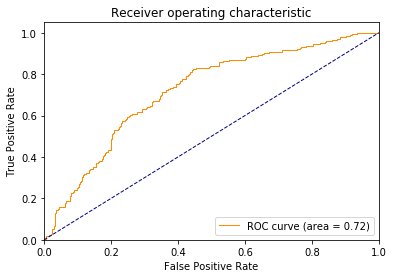

In [183]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Saving the model**

In [184]:
filename = 'svm_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/svm_model.pkl']

#### Decision Trees Classifier

In [295]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()


In [269]:
clf2.fit(X_resampled[1], y_resampled[1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [270]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf2.predict(X_test),
)

In [271]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf2.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.86      0.86      0.86       728
          1       0.41      0.41      0.41       176

avg / total       0.77      0.77      0.77       904

Test-data overall accuracy 0.7710176991150443


In [296]:
# Fit with all data to compare accuracy
fitModel(X_resampled, y_resampled, "DT", clf2)

Email classification report from  DT , SMOTE =  regular
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       728
          1       0.32      0.28      0.30       176

avg / total       0.73      0.74      0.74       904

Test-data overall accuracy 0.7411504424778761
------------------------------------

Email classification report from  DT , SMOTE =  borderline1
             precision    recall  f1-score   support

          0       0.83      0.86      0.85       728
          1       0.32      0.27      0.29       176

avg / total       0.73      0.75      0.74       904

Test-data overall accuracy 0.7466814159292036
------------------------------------

Email classification report from  DT , SMOTE =  borderline2
             precision    recall  f1-score   support

          0       0.83      0.84      0.83       728
          1       0.28      0.27      0.28       176

avg / total       0.72      0.73      0.72       904

Test-data o

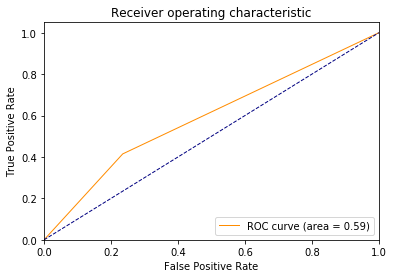

In [246]:
y_score = clf2.fit(X_resampled[1], y_resampled[1]).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [195]:
# Getting the predicted sentences

predClass = clf2.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                      sentence_content
288  I found this interesting Website accessibility...
289  Apologies now in case this page is not accessible
290  - it's just that the results are very interest...
307  JKD advises all recipients to virus scan any f...
310                                     Where exactly?
313  - I can't get at the results either with Opera...
314  Yes, please, an update to the list of the data...
316              - Tina Holmboe Greytower Technologies
320  Sorry, the page was designed by a person with ...
341                                  http://tom.me.uk/
343                             Web Site Accessibility
347  2.) No - but it will be within the next 12 mon...
357  (it might have been swayed by it being posted ...
367  > Wonder how many of those have actually check...
380  I will email again today and see if I can get ...
386  > Maybe if the site responds, he'll forward th...


**Saving the model**

In [196]:
filename = 'dt_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/dt_model.pkl']

#### Random Forest Classifier

In [297]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators=10)

In [208]:
clf3.fit(X_resampled[3], y_resampled[3])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [209]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf3.predict(X_test)
)

In [210]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf3.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.85      0.84      0.85       728
          1       0.37      0.38      0.38       176

avg / total       0.76      0.75      0.75       904

Test-data overall accuracy 0.7533185840707964


In [298]:
# Fit with all data to compare accuracy
fitModel(X_resampled, y_resampled, "RF", clf3)

Email classification report from  RF , SMOTE =  regular
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       728
          1       0.33      0.30      0.31       176

avg / total       0.73      0.74      0.74       904

Test-data overall accuracy 0.7433628318584071
------------------------------------

Email classification report from  RF , SMOTE =  borderline1
             precision    recall  f1-score   support

          0       0.84      0.87      0.85       728
          1       0.35      0.30      0.32       176

avg / total       0.74      0.76      0.75       904

Test-data overall accuracy 0.7577433628318584
------------------------------------

Email classification report from  RF , SMOTE =  borderline2
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       728
          1       0.32      0.29      0.31       176

avg / total       0.73      0.74      0.74       904

Test-data o

In [211]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf3, X_resampled[3], y_resampled[3], scoring='precision')
scores.mean() 

0.5126716283643585

In [205]:
# Getting the predicted sentences

predClass = clf3.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                      sentence_content
288  I found this interesting Website accessibility...
290  - it's just that the results are very interest...
305  James Kelsey Design Ltd (JKD) or The Incepta G...
311  > I found this interesting Website accessibili...
313  - I can't get at the results either with Opera...
314  Yes, please, an update to the list of the data...
367  > Wonder how many of those have actually check...


**Saving the model**

In [206]:
filename = 'rf_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/rf_model.pkl']

#### Naive Bayes

In [299]:
from sklearn.naive_bayes import GaussianNB

clf4 = GaussianNB()

In [214]:
clf4.fit(X_resampled[2], y_resampled[2])

GaussianNB(priors=None)

In [215]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    clf4.predict(X_test)
)

In [216]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    clf4.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       728
          1       0.39      0.38      0.38       176

avg / total       0.76      0.76      0.76       904

Test-data overall accuracy 0.7610619469026548


In [300]:
# Fit with all data to compare accuracy
fitModel(X_resampled, y_resampled, "GNB", clf4)

Email classification report from  GNB , SMOTE =  regular
             precision    recall  f1-score   support

          0       0.87      0.64      0.73       728
          1       0.29      0.60      0.39       176

avg / total       0.76      0.63      0.67       904

Test-data overall accuracy 0.629424778761062
------------------------------------

Email classification report from  GNB , SMOTE =  borderline1
             precision    recall  f1-score   support

          0       0.87      0.65      0.74       728
          1       0.29      0.59      0.38       176

avg / total       0.75      0.63      0.67       904

Test-data overall accuracy 0.6338495575221239
------------------------------------

Email classification report from  GNB , SMOTE =  borderline2
             precision    recall  f1-score   support

          0       0.87      0.69      0.77       728
          1       0.31      0.59      0.41       176

avg / total       0.76      0.67      0.70       904

Test-data

In [217]:
gausianScores = cross_val_score(clf4, X_resampled[2], y_resampled[2], scoring='recall')
gausianScores.mean() 

0.609907120743034

In [218]:
# Getting the predicted sentences

predClass = clf4.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                      sentence_content
290  - it's just that the results are very interest...
305  James Kelsey Design Ltd (JKD) or The Incepta G...
306  JKD run anti virus software on all servers and...
309  > I found this interesting Website accessibili...
311  > I found this interesting Website accessibili...
314  Yes, please, an update to the list of the data...
322  The poll is just visible without scrolling dow...
326  >> I found this interesting Website accessibil...
331  > Yes, please, an update to the list of the da...
332  So far, the poll results say that 47% of the p...
335  >> I found this interesting Website accessibil...
337  The poll did not display for me either, as you...


**Saving the model**

In [219]:
filename = 'gnb_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/gnb_model.pkl']

#### Bagging Classifier using Decision Trees

In [303]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [304]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [305]:
classif_report = sklearn.metrics.classification_report(
    y_test,
    bagging.predict(X_test)
)

In [306]:
print("Email classification report")
print(classif_report)

test_acc = sklearn.metrics.accuracy_score(
    y_test,
    bagging.predict(X_test)
)

print("Test-data overall accuracy", test_acc)

Email classification report
             precision    recall  f1-score   support

          0       0.81      0.98      0.89       728
          1       0.41      0.07      0.12       176

avg / total       0.73      0.80      0.74       904

Test-data overall accuracy 0.7997787610619469


In [302]:
# Fit with all data to compare accuracy
fitModel(X_resampled, y_resampled, "Bagging", bagging)

Email classification report from  Bagging , SMOTE =  regular
             precision    recall  f1-score   support

          0       0.82      0.96      0.89       728
          1       0.46      0.15      0.22       176

avg / total       0.75      0.80      0.76       904

Test-data overall accuracy 0.8008849557522124
------------------------------------

Email classification report from  Bagging , SMOTE =  borderline1
             precision    recall  f1-score   support

          0       0.83      0.92      0.87       728
          1       0.39      0.20      0.27       176

avg / total       0.74      0.78      0.76       904

Test-data overall accuracy 0.7831858407079646
------------------------------------

Email classification report from  Bagging , SMOTE =  borderline2
             precision    recall  f1-score   support

          0       0.82      0.96      0.89       728
          1       0.45      0.14      0.21       176

avg / total       0.75      0.80      0.75       9

In [224]:
gausianScores = cross_val_score(bagging, X_resampled[3], y_resampled[3], scoring='recall') # score = recall ....  TNR or specificity
gausianScores.mean() 

0.8422807177047993

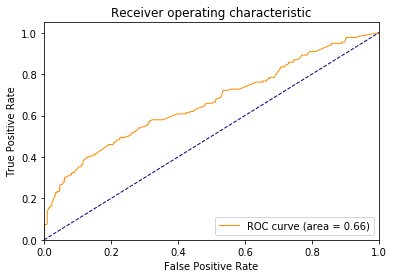

In [225]:
y_score = bagging.fit(X_resampled[3], y_resampled[3]).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [226]:
# Getting the predicted sentences

predClass = bagging.predict(X_test)
summary = getPredictedSentences(predClass, 32)
print(summary)

                                      sentence_content
288  I found this interesting Website accessibility...
290  - it's just that the results are very interest...
305  James Kelsey Design Ltd (JKD) or The Incepta G...
306  JKD run anti virus software on all servers and...
308                                        > Dear All,
310                                     Where exactly?
311  > I found this interesting Website accessibili...
313  - I can't get at the results either with Opera...
322  The poll is just visible without scrolling dow...
341                                  http://tom.me.uk/
349        4.) No - it would be too difficult to do 6%
377  And that person is still waiting to hear from ...
380  I will email again today and see if I can get ...


**Saving the model**

In [227]:
filename = 'bagging_model.pkl'
joblib.dump(bagging, path+filename)

['../app/ml_models/bagging_model.pkl']

### Implementing Cross Validation to find best hiper parameters

**_This migth tahe a while_**

In [498]:
n_samples, n_features = X_resampled[3].shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X_resampled[3], random_state.randn(n_samples, 200 * n_features)]

In [ ]:
# Classification and ROC analysis
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='poly', probability=True,
                     random_state=random_state, class_weight='balanced')

In [ ]:
from scipy import interp
import time

start_time = time.time()

plt.figure(figsize=(15, 12))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_resampled[3], y_resampled[3]):
    probas_ = classifier.fit(X_resampled[3][train], y_resampled[3][train]).predict_proba(X_resampled[3][test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_resampled[3][test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))